<a href="https://colab.research.google.com/github/danjohnvelasco/AI-Sandbox/blob/master/Neural_Network_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network from Scratch

My attempt in learning the concept of neural networks from ground up.


In [35]:
!pip show fastai

Name: fastai
Version: 1.0.61
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: pandas, pyyaml, nvidia-ml-py3, numexpr, numpy, bottleneck, dataclasses, beautifulsoup4, Pillow, fastprogress, packaging, requests, torchvision, torch, spacy, scipy, matplotlib
Required-by: 


In [ ]:
!nvidia-smi

Wed Dec 16 01:21:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [36]:
# autoreloads all modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
proj_path = '/content/drive/My Drive/fastai/part2'
%cd {proj_path}

/content/drive/My Drive/fastai/part2


In [38]:
from test import *
from mnist import *
from matmul import *

In [39]:
# Demo importing and using python module
test_eq("HELLO", 'HELLO')

In [40]:
from pathlib import Path
from IPython.core.debugger import set_trace
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

## Get Data

In [ ]:
x_train,y_train,x_valid,y_valid = load_mnist()

Test Status: Pass
Data loaded successfully!


In [ ]:
mpl.rcParams['image.cmap'] = 'gray'

In [ ]:
img = x_train[0]

In [ ]:
img.view(28,28).type()

'torch.FloatTensor'

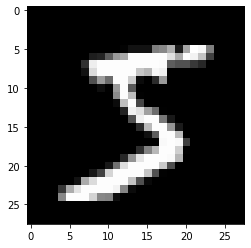

In [ ]:
plt.imshow(img.view((28,28)));

In [ ]:
weights = torch.randn(784,10) # 784 refers to mnist, 10 refers to number of activations (digits 0-9)
bias = torch.zeros(10)

In [ ]:
m1 = x_valid[:5]
m2 = weights

In [ ]:
# confirm shape
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

## Matrix Multipication

In [ ]:
from matmul import *

In [ ]:
# result should have dimension 5 x 10
# this is slow
%time t1 = matmul_basic(m1, m2)

CPU times: user 841 ms, sys: 0 ns, total: 841 ms
Wall time: 845 ms


In [ ]:
# The result is correct
t1.shape

torch.Size([5, 10])

## Elementwise operations

Refactor your matmul loop to utilize elementwise vector operations

In [ ]:
from matmul import *

In [ ]:
m1 = x_valid[:5]
m2 = weights

# confirm shape
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
# It's now ~10x faster because we're using
# elementwise vector operations written in pytorch
# which is probably not written in python
%time t1 = matmul_el(m1, m2)

CPU times: user 1.76 ms, sys: 0 ns, total: 1.76 ms
Wall time: 1.78 ms


In [ ]:
# The result is correct
t1.shape

torch.Size([5, 10])

In [ ]:
test_near(matmul(m1,m2), matmul_el(m1,m2))

In [ ]:
# Both matmul are identical
matmul(m1,m2)[0], matmul_el(m1,m2)[0]

(tensor([ -9.8819, -18.7256, -17.7464,  -7.4682,  -0.6600,  -3.2809,  -4.9012,
          -9.8645,   5.9814,   0.4755]),
 tensor([ -9.8819, -18.7256, -17.7464,  -7.4682,  -0.6600,  -3.2809,  -4.9012,
          -9.8645,   5.9814,   0.4755]))

## Broadcasting

In [ ]:
# Toy small data to visualize the algorithm
a = torch.rand(3, 3)
b = torch.rand(3, 2)
print(a)
print(b)

tensor([[0.5207, 0.1138, 0.8574],
        [0.2467, 0.3023, 0.0629],
        [0.9243, 0.3711, 0.2248]])
tensor([[0.1439, 0.3608],
        [0.5772, 0.2038],
        [0.7731, 0.7944]])


In [ ]:
m1 = x_valid[:5]
m2 = weights

# confirm shape
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
from matmul import *

In [ ]:
# Runtime now in µs, previously in ms
%time t1 = matmul_br(m1, m2)

CPU times: user 550 µs, sys: 0 ns, total: 550 µs
Wall time: 555 µs


In [ ]:
t1.shape

torch.Size([5, 10])

In [ ]:
test_near(matmul_el(m1,m2), matmul_br(m1,m2))

## Einstein Summation

In [ ]:
from matmul import *

In [ ]:
# Much faster than broadcasting version
%time t1 = matmul_einsum(m1, m2)

CPU times: user 184 µs, sys: 45 µs, total: 229 µs
Wall time: 234 µs


In [ ]:
t1.shape

torch.Size([5, 10])

In [ ]:
test_near(matmul_el(m1,m2), matmul_einsum(m1,m2))

## Default pytorch matmul (fastest)

In [ ]:
from matmul import *

In [ ]:
# Fastest
%time t1 = matmul_fastest(m1,m2)

CPU times: user 93 µs, sys: 23 µs, total: 116 µs
Wall time: 120 µs


In [ ]:
# Uses pytorch matmul when operands are pytorch tensors
%time t2 = m1@m2

CPU times: user 133 µs, sys: 0 ns, total: 133 µs
Wall time: 137 µs


In [ ]:
test_near(t1, t2)

In [ ]:
# linear layer w/ bias
t2 = linear(x=m1,w=m2,b=0)

In [ ]:
# Check if linear function is working correctly
test_near(t1, t2)

## Forward Pass

In [ ]:
from matmul import *
from activations import *

### Get Data and Normalization

Normalization typically means rescales the values into a range of [0,1]. Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).
[[Source]](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf)

Sometimes the terms are used interchangeably pero iba talaga ibig sabihin. Parang sa lesson na to, normalization tawag nila sa standardization.

**Formula:**

z = x - mean / stdev

where z is the standardized value

In [41]:
x_train,y_train,x_valid,y_valid = load_mnist()

Test Status: Pass
Data loaded successfully!


In [42]:
x_train.mean(), x_train.std(), x_valid.mean(), x_valid.std()

(tensor(0.1304), tensor(0.3073), tensor(0.1287), tensor(0.3050))

In [43]:
def normalize(x, m, s): 
    return (x-m)/s

In [44]:
# We must standardize our input first
# To standardize, you must (x - mean)/std

# Get the mean and std
train_mean,train_std = x_train.mean(),x_train.std()
train_mean,train_std

(tensor(0.1304), tensor(0.3073))

In [45]:
# standardize train set
x_train = normalize(x_train, train_mean, train_std)

# standardize validation set
# Note: Use train set mean, not validation mean kasi magkaiba yan ng distribution
x_valid = normalize(x_valid, train_mean, train_std)

In [46]:
# Standardization should turn mean = 0, std = 1
x_train.mean(), x_train.std(), x_valid.mean(), x_valid.std()

(tensor(3.8966e-08), tensor(1.), tensor(-0.0059), tensor(0.9924))

In [47]:
# Value is not rescaled between 0 and 1 which shows
# that this is not the same as normalization
x_train.min(), x_train.max()

(tensor(-0.4245), tensor(2.8170))

### Defining basic architecture

Here, we'll use Mean Squared Error (MSE) as a loss function to keep things simple. That's why you'll see that the output is of size **1**.

In [48]:
# num of hidden units
nh = 50

# length of input (flattened 28 x 28 img)
m = 784

n = 50,000
c = tensor(10)

In [49]:
# naive random init
w1 = torch.randn(m,nh)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)
b2 = torch.zeros(1)

w1.mean(), w1.std()

(tensor(0.0003), tensor(0.9932))

In [50]:
# Input has mean=0, std=1
x_valid.mean(), x_valid.std()

(tensor(-0.0059), tensor(0.9924))

The result doesn't have a mean=0, std=1

What we want is to have those properties in the activations

Why? We'll know in the following lectures. (AUTHOR, ANSWER THIS LATER)

In [ ]:
t1 = linear(x_valid, w1, b1)
t1.mean(), t1.std()

(tensor(0.1957), tensor(25.9628))

In [ ]:
# standard xavier init
w1 = torch.randn(m,nh)/math.sqrt(m)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)/math.sqrt(nh)
b2 = torch.zeros(1)

w1.mean(), w1.std()

(tensor(8.6533e-05), tensor(0.0357))

Using xavier init, the activations have mean=0, std=1 (or at least, close to it)


In [ ]:
t1 = linear(x_valid, w1, b1)
t1.mean(), t1.std()

(tensor(-0.0810), tensor(1.0039))

But after a relu, it's gone...

Why? Because RELU gets rid of the negatives that is why the mean is almost halved

In [ ]:
t1 = relu(linear(x_valid, w1, b1))
t1.mean(), t1.std()

(tensor(0.3562), tensor(0.5635))

**This is where kaiming init comes to the rescue!**

Standard deviation will halve every layer which means that there is not much left after a couple of layers. We solve this problem by dividing 2 with m.



```
math.sqrt(2/m)
```



In [ ]:
# kaiming init
w1 = torch.randn(m,nh)*math.sqrt(2/m)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)*math.sqrt(2/nh)
b2 = torch.zeros(1)

w1.mean(), w1.std()

(tensor(0.0002), tensor(0.0505))

The standard deviation should now be closer to 1.

In [ ]:
t1 = relu(linear(x_valid, w1, b1))
t1.mean(), t1.std()

(tensor(0.5217), tensor(0.8159))

One slight problem though, the mean is still not closer to 0.

So Jeremy Howard thought, why not subtract 0.5 from the relu function?


```
def relu(x): return x.clamp_min(0.) - 0.5
```

Let's see how it goes...


In [51]:
def relu(x): return x.clamp_min(0.) - 0.5

This should show that the mean is closer to 0 now.

In [17]:
t1 = relu(linear(x_valid, w1, b1))
t1.mean(), t1.std()

(tensor(10.9083), tensor(16.1153))

At this point, I still don't get it why subtract 0.5 from the relu. What's happening here is that instead of removing the negatives, we replace all negatives with -0.5. See the following cells.

**I still don't know why it's so important to keep the mean closer to 0 and std closer to 1, but we'll find out in the upcoming lectures. Right now, we're at Lesson 8.**

In [ ]:
t1.min(), t1.max()

(tensor(-0.5000), tensor(6.5514))

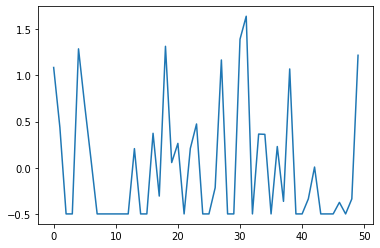

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t1[0].numpy())

At this point, we now have linear layer (matrix multiplication), activation function (ReLU), decent network normalization (or more accurately, standardization), and initialization (kaiming init) so we can now do a **Forward Pass**.

All of these are implemented in PyTorch so let's use that instead.

In [52]:
from torch.nn import init

# initialize tensors
w1 = torch.zeros(m,nh)
b1 = torch.zeros(nh)

# perform kaiming initialization
# fan_out means we divide by nh in kaiming init which means the variance is 
# 1 (or closer to 1) during the backward pass. Note: Implementation details 
# nalang ito at hindi ganoon ka related sa concepts
init.kaiming_normal_(w1, mode='fan_out')
t = relu(linear(x_valid, w1, b1))

### Doing a Forward Pass

In [19]:
def model(xb):
    # kaiming init
    w1 = torch.randn(m,nh)*math.sqrt(2/m)
    b1 = torch.zeros(nh)
    w2 = torch.randn(nh,1)*math.sqrt(2/nh)
    b2 = torch.zeros(1)

    # architecture
    i_h = relu(linear(xb, w1, b1)) # input to hidden
    h_o = linear(i_h, w2, b2) # hidden to output

    return h_o

In [20]:
t1=model(x_train)

In [21]:
# Should be 50,0000 x 1
t1.shape

torch.Size([50000, 1])

### Short review for torch.unsqueeze and squeeze

In [ ]:
x = torch.tensor([1, 2, 3, 4])
x.size()

torch.Size([4])

In [ ]:
# Add dimension of size one to the left
torch.unsqueeze(x, 0).size()

# Add dimension of size one to the right
torch.unsqueeze(x, 1).size()

(torch.Size([1, 4]), torch.Size([4, 1]))

In [ ]:
y = torch.unsqueeze(x, 1)
z = torch.unsqueeze(y, 0)
z.size()

torch.Size([1, 4, 1])

In [ ]:
z.squeeze().size()

torch.Size([4])

In [ ]:
# Remove
a = torch.unsqueeze(x, 1)
a.size(), a.squeeze(-1).size()

(torch.Size([4, 1]), torch.Size([4]))

### Loss function: MSE

#### $MSE = \frac{1}{n}\sum_{i=1}^{n} (y_{i}-\hat{y}_{i})^{2}$

In [22]:
def mse(output, targ):
    # We need to get rid of the trailing (,1) dimension of i_h ([50000,1])
    # to get MSE to work
    return (output.squeeze(-1) - targ).pow(2).mean()

In [23]:
y_train,y_valid = y_train.float(),y_valid.float()

In [24]:
preds = model(x_train)

In [25]:
preds.shape

torch.Size([50000, 1])

In [26]:
mse(preds, y_train)

tensor(33.2137)

## Gradients and backward pass


We'll calculate the gradients starting from the very last function back to the
very first function.

### For calculating gradient of the loss function w.r.t. to the output of previous layer

Recall that $MSE = \frac{1}{n}\sum_{i=1}^{n} (y_{i}-\hat{y}_{i})^{2}$ where $y$ is the output of previous layer.

Take the $\frac{\partial }{\partial y}$

We can ignore the $\sum$ for now and focus on $\frac{1}{n} (y_{i}-\hat{y}_{i})^{2}$

By chain rule:

$\frac{\partial f}{\partial y} = \frac{2}{n} (y_{i}-\hat{y}_{i})*1-0$


**Final answer:**

$\frac{\partial f}{\partial y} = \frac{2}{n} (y_{i}-\hat{y}_{i})$




In [27]:
# let's take a look at the dimension of the model's output
# this is mse_grad's inp parameter
t1=model(x_train)
t1.shape

torch.Size([50000, 1])

In [28]:
# let's take a look at the dimension of the gold labels
# this is mse_grad's targ parameter
y_train.shape

torch.Size([50000])

In [31]:
def mse_grad(inp, targ):
    # the inp is the output of the previous layer
    # inp and targ must have the same dimension to do arithmetic operations
    # reduce the dimension of inp to match targ's dimension
    # take the gradient
    # return it to rank 2 tensor
    # store it in the inp
    # by storing it in the inp, the previous layer can access it. Why?
    # think backwards
    inp.g = 2 * (inp.squeeze(-1) - targ).unsqueeze(-1) / inp.shape[0]

### For calculating the gradient of ReLU

Recall that ReLU replaces the negatives with 0 and retains all positives which gives us a straigh line (y=x) on the 1st quadrant and flat line at the negative x-axis.

In other words:

         f(x) = 0 if x < 0
                x if x >= 0  

Calculating the gradient:

         f'(x) = 0 if x < 0
                 1 if x >= 0  




In [32]:
def relu_grad(inp, out):
    # you can access the mse_grad from out param
    # multiply the gradient of loss function i.e. the next layer
    # to the derivative of the ReLU
    inp.g = (inp>0).float() * out.g

### For calculating the gradient of linear layer (matrix multiplication)

Recall that linear is just x @ w + b. Where @ is matrix multiplication, x = input, w = weights, and b = bias.

####To use chain rule for the dot product
Recall that a dot product is the same as doing element-wise multiplication and then summing it up ($ sum(x {\otimes} w) $).

To break it down into components: 

$\vec{u} = \vec{x} {\otimes} \vec{w}$

$v = sum(\vec{u}))$

$y = v + b$

If you substitute them all together it gives:

$y = sum(x {\otimes} w) + b$

which is similar to this:

$y = \ x {\cdot}  w + b $

**The gradient of matmul w.r.t. to input:**

$\frac{\partial y}{\partial \vec{x}} = \frac{\partial}{\partial \vec{x}} sum(x {\otimes} w) + \frac{\partial}{\partial \vec{x}} b$

Let's focus on  $\frac{\partial}{\partial \vec{x}} sum(x {\otimes} w)$:

Since we know that $\vec{u} = \vec{x} {\otimes} \vec{w}$, $v = sum(\vec{u}))$
, and $y = v + b$, then...

$\frac{\partial y}{\partial \vec{x}} = \frac{\partial y}{\partial v} \frac{\partial v}{\partial \vec{u}} \frac{\partial \vec{u}}{\partial \vec{x}}$

$\frac{\partial \vec{u}}{\partial \vec{x}} = diag(w)$ ; diagonal matrix

$\frac{\partial v}{\partial \vec{u}} = \vec{1}^{T}$ ; just a horizontal vector of 1's

$\frac{\partial y}{\partial v} = 1 + 0$

Therefore,

$\frac{\partial y}{\partial x} = 1 * \vec{1} * w$ ; e.g. 1 x 3 * 3 x 3 = 1 x 3 yung diagonal matrix naging horizontal vector lang.

$\frac{\partial y}{\partial x} = w^{T}$ ; so yung mga weights na transpose lang (naging horizontal vector) pero matrix padin in practice kasi by batch siya i-process. Math-wise, you can treat them as a single instance represented in a vector.


**The gradient of matmul w.r.t. to weights:**

Similar to computation above...

$\frac{\partial y}{\partial \vec{w}} = \frac{\partial}{\partial \vec{w}} sum(x {\otimes} w) + \frac{\partial}{\partial \vec{w}} b$


$\frac{\partial y}{\partial \vec{x}} = \frac{\partial y}{\partial v} \frac{\partial v}{\partial \vec{u}} \frac{\partial \vec{u}}{\partial \vec{x}}$

$\frac{\partial \vec{u}}{\partial \vec{w}} = diag(x)$ ; diagonal matrix

$\frac{\partial v}{\partial \vec{u}} = \vec{1}^{T}$ 

$\frac{\partial y}{\partial v} = 1 + 0$

Therefore,

$\frac{\partial y}{\partial x} = 1 * \vec{1} * x$ 

$\frac{\partial y}{\partial x} = x^{T}$ 

**The gradient of matmul w.r.t. to bias:**

In [33]:
def lin_grad(inp, out, w, b):
    # inp : output of previous layer
    # out : out.g is gradient of next layer
    # w   : weights
    # b   : bias
    
    # grad wrt to input is just weights transpose
    inp.g = out.g @ w.t()       # grad of next layer * grad of this layer

    # grad wrt to w is just the inputs
    w.g =  (inp.unsqueeze(-1) * out.g.unsqueeze(1)).sum(0) # sum(input * grad of next layer); may sum dahil sa cost function MSE ay may summation (which is inignore natin kanina)

    # grad wrt to b is just vector of 1's
    b.g = out.g.sum(0) # sum(1 * grad of next layer); again, may sum dahil sa MSE

In [34]:
def forward_and_backward(inp, targ):
    # forward pass:
    l1 = inp @ w1 + b1
    l2 = relu(l1)
    out = l2 @ w2 + b2

    # Hindi ginagamit ang loss (scalar) per se sa computation ng gradients. Para lang siya sa tao.
    # Hindi siya ginagamit in a sense na kahit tanggalin ko tong line of code na to, magagawa padin ang backpropagation
    loss = mse(out, targ)

    # backward pass
    # chain rule lang from loss function to first layer (not including data input)
    # na iniistore yung gradients at pinapasa pabalik (backwards)
    mse_grad(out, targ)
    lin_grad(l2, out, w2, b2)
    relu_grad(l1, l2)
    lin_grad(inp, l1, w1, b1)

In [56]:
def model(inp, targ):
    # forward pass:
    l1 = inp @ w1 + b1
    l2 = relu(l1)
    out = l2 @ w2 + b2

    # Hindi ginagamit ang loss (scalar) per se sa computation ng gradients. Para lang siya sa tao.
    # Hindi siya ginagamit in a sense na kahit tanggalin ko tong line of code na to, magagawa padin ang backpropagation
    loss = mse(out, targ)

    # backward pass
    # chain rule lang from loss function to first layer (not including data input)
    # na iniistore yung gradients at pinapasa pabalik (backwards)
    mse_grad(out, targ)
    lin_grad(l2, out, w2, b2)
    relu_grad(l1, l2)
    lin_grad(inp, l1, w1, b1)

In [57]:
# kaiming init
w1 = torch.randn(m,nh)*math.sqrt(2/m)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)*math.sqrt(2/nh)
b2 = torch.zeros(1)

model(x_train, y_train)

In [58]:
# Save for testing against later
w1g = w1.g.clone()
w2g = w2.g.clone()
b1g = b1.g.clone()
b2g = b2.g.clone()
ig  = x_train.g.clone()

We use autograd to check if our results matches PyTorch's

In [59]:
xt2 = x_train.clone().requires_grad_(True)
w12 = w1.clone().requires_grad_(True)
w22 = w2.clone().requires_grad_(True)
b12 = b1.clone().requires_grad_(True)
b22 = b2.clone().requires_grad_(True)

In [60]:
def forward(inp, targ):
    # forward pass:
    l1 = inp @ w12 + b12
    l2 = relu(l1)
    out = l2 @ w22 + b22
    # we don't actually need the loss in backward!
    return mse(out, targ)

In [61]:
loss = forward(xt2, y_train)

In [63]:
# Computes the gradient of current tensor w.r.t. graph leaves
loss.backward()

In [65]:
# Our gradients are almost the same as PyTorch's
test_near(w22.grad, w2g)
test_near(b22.grad, b2g)
test_near(w12.grad, w1g)
test_near(b12.grad, b1g)
test_near(xt2.grad, ig)

In [73]:
w2g, w22.grad

(tensor([[ 0.0160],
         [ 3.1725],
         [-0.0780],
         [ 2.3847],
         [-1.3138],
         [-7.2877],
         [ 0.0291],
         [-0.9729],
         [ 2.6821],
         [ 1.9815],
         [ 0.8676],
         [-2.0644],
         [-0.6822],
         [-3.1738],
         [-0.6303],
         [-2.2340],
         [ 3.6144],
         [-2.9175],
         [-3.8486],
         [ 2.2971],
         [ 0.5628],
         [-0.5422],
         [ 3.3900],
         [-5.8169],
         [-0.0593],
         [-3.8683],
         [ 1.2840],
         [ 1.9721],
         [-0.3568],
         [-8.8591],
         [ 1.5657],
         [ 3.4140],
         [-1.4701],
         [-5.7629],
         [-4.1701],
         [ 3.2771],
         [ 2.2940],
         [ 3.0983],
         [ 3.7652],
         [-8.9139],
         [-3.6991],
         [ 1.4770],
         [ 0.2276],
         [ 3.3148],
         [ 0.2902],
         [ 3.5102],
         [-1.3987],
         [ 2.0827],
         [ 1.6408],
         [-1.1727]])

## Refactor everything

Now that we've coded from scratch the essential pieces: matrix multiplication, kaiming initialization, activation (ReLU), loss (MSE), forward and backward pass, we can now refactor the code to make it usable.

We can also now use PyTorch since we already know how the pieces work so it's not magical now.